# Modelo de Rozenberg 3.1

### Comienzo del programa
***
Se importan las librerías de las funciones a utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parametros iniciales del programa
***
Se definen los valores y datos a utilizar para el desarrollo del problema:

* **_n_**   : tamaño total de la muestra (bines)
* **_nc_**  : tamaño de la zona de los contactos
* **_di(i)_**   : densidad de vacancias en el sitio i
* **_rho(i)_**  : resistividad en el sitio i
* **_delta(i)_**: cambio de densidad del sitio i
* **_vb(i)_**: movilidad de cada sitio i
* **_v(i)_** : potencial de cada sitio i
* **_vtotal, i_total_**: potencial y corriente total


<img src="Modelo de Rozenberg 01.jpg">

In [2]:
###Definicion de mis variabales en Python
N=  100                         #Parametro para variar extension de las listas
n = list(range(0,N+1))            #Listado de tamaño total de la muestra
vb= list(range(0,N+1))            #Listado - movilidad de cada sitio i
NR= 10                          #Parametro - tamaño del extremo derecho
NL= 10                          #Parametro - tamaño del extremo izquierdo
NB= N-(NR+NL)                   #Parametro - tamaño del nucleo (bulk)
VBA=16                          #Parametros - movilidad en extremos
VBB=16                          #Parametros - movilidad en el nucleo

#print(n[N])
#print(n[0])
#print(n)
#las listas asi definidas vas de 0 a 100 n[0]=0, n[N=100]=100. y por lo tanto tienen 101 elementos en total

### Parametros de movilidad de los contactos
***
* Vba y Vbb: parametros de movilidad de los contactos (Vba) y del volumen (Vbb)
* En este caso Vba‡Vbb
* El perfil de vb(i) puede ser suave o abrupto (si width==0)
* _width_ es el ancho de transicion entre una zona y otra, es  para hacer el cambio de resist. mas suave
      

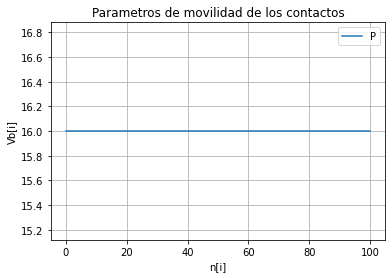

In [3]:
for i in n:
    if i <= NL:
        vb[i]=VBA
    elif i >=len(n)-NR:   #obtengo long de la lista n
        vb[i]=VBA
    else:
        vb[i]=VBB
        
plt.plot(n, vb)
plt.legend('Parametros de movilidad de los contactos')
plt.xlabel('n[i]')
plt.ylabel('Vb[i]')
plt.title('Parametros de movilidad de los contactos')
plt.grid(True)

### Parametros que definen las rampas de potencial
***
0 --> Vmax --> 0 --> -Vmax      en tiempo s

* **_Vmax_**               : Voltaje maximo
* **_V0 =_** _Vmax*0.016_    : constante adimensional  
* **_s_**                  : tiempo que dura cada ciclo
* **_n_ciclos_**           : numero de ciclos totales
* **_tau= n_ciclos * s_**  : tiempo total del experimento

En cada paso temporal de la simulacion t (1<= t <=tau) se aplica un voltaje externo V(t)  

La corriente del sistema es I(t)= V(t)/rhotot

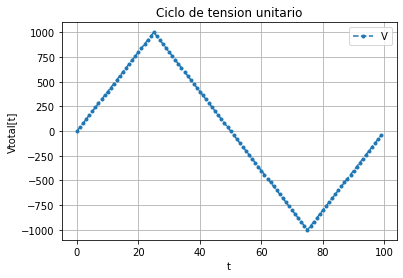

In [4]:
#Ciclo de tension unitario
Vmax=1000                #Seteado asi en Rozenberg
s=100                    #Cantidad de time steps t que componen un ciclo de tension unitario
k=Vmax/(s/4)             #Pendiente de la rampa

t_ciclo = list(range(0,s))
V_total = list(range(0,s))

V0=Vmax*0.016            #Seteado asi en Rozemberg

for t in t_ciclo:
    if (0 <= t <s/4):
        V_total[t]= k*t
    if (s/4 <= t <=s*3/4):
        V_total[t]= 2*Vmax-k*t
    if (s*3/4 < t <=s):
        V_total[t]= -4*Vmax+k*t
               
plt.plot(t_ciclo, V_total, '.', linestyle='dashed', label='Ciclo de tension')
plt.legend('V_total')
plt.xlabel('t')
plt.ylabel('Vtotal[t]')
plt.title('Ciclo de tension unitario')
plt.grid(True)        

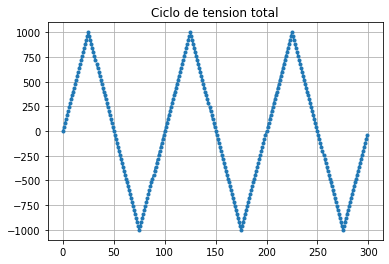

In [5]:
#Ciclo de tension del experimento
n_ciclos= 3              #Cantidad de ciclos que componen el experimento
tau= n_ciclos*s          #Tiempo total de la secuencia
  
V_total2= list(range(0,0))
if n_ciclos>1:
    cont_ciclos=list(range(0,n_ciclos))
    t_ciclo2 = list(range(0,tau))
    #V_total2 =V_total
    for n in cont_ciclos:
        V_total2.extend(V_total)
        
V_total=V_total2
t_ciclo=t_ciclo2
        
#print(V_total2)        
plt.plot(t_ciclo2, V_total2, '.', linestyle='dashed', label='Ciclo de tension')
plt.title('Ciclo de tension total')
plt.grid(True)

### Densidad de vacancias inicial y total
***
La densidad de vacancias iniciales se setean en 10E-4  
La densidad de vacancias total sera la sumatoria de todas las vacancias locales

In [6]:
#Densidad de vacancias inicial --> 10E-4 Rozemberg
di= list(range(0,N+1)) 
n = list(range(0,N+1))
for i in n:
    di[i]=10E-4

#Densidad de vacancias total
dtot=0
for i in n:
    dtot+=di[i]

### Resistividades locales
***
Se determinan los parametros para calcular la resistividad local y posteriormente total  
*Fact* son constantes en cada sector de la muestra  
La resistividad de cada sitio se define como:  
                *R(i) = A(i) * di(i)*

In [7]:
rho= list(range(0,N+1))         #Variable de resistividad local
AL = 1000                       #Valores seteados asi en Rozemberg et all
AR = 1000
AB = 1

rho_total= list(range(0,tau))    ##Resistencia total
rho_izq  = list(range(0,tau))    ##Resistencia izquierda
rho_der  = list(range(0,tau))    ##Resistencia derecha

### Definicion de otras variables
***


In [8]:
i_total= list(range(0,tau))

pi_i_r = list(range(0,N+1))
pi_i_l = list(range(0,N+1))
pi_r_i = list(range(0,N+1))
pi_l_i = list(range(0,N+1))
delta  = list(range(0,N+1))

v     = list(range(0,N+1))
piip1 = list(range(0,N+1))
pip1i = list(range(0,N+1))
piim1 = list(range(0,N+1))
pim1i = list(range(0,N+1))
deltap= list(range(0,N+1))
deltam= list(range(0,N+1))

### Cuerpo del codigo
***

In [9]:
for t in t_ciclo:
    #Calculamos resistencias locales
    for i in n:
        if i <= NL:
            rho[i]=AL*di[i]
        elif i >=len(n)-NR:
            rho[i]=AR*di[i]
        else:
            rho[i]=AB*di[i]
    #Resistencias totales
    for i in n:
        rho_total[t]= rho_total[t]  + rho[i]
        if i <= NL:
            rho_izq[t] = rho_izq[t] + rho[i]
        if i>=len(n)-NR:
            rho_der[t] = rho_der[t] + rho[i]

    #Corriente total
    i_total[t]= V_total[t]/rho_total[t] 
    
    dvisum=0
    for i in n:
        dvi= V_total[t]*rho[i]/rho_total[t] 
        dvisum=dvi+dvisum
        v[i]=V_total[t]-dvisum

    #Defino varialbes para tiempo t --> me simplifica no tener que estar buscando el indice mas adelante
    #Defino condiciones de borde de v
    itotal=i_total[t]
    vtotal=V_total[t]
    rhotot=rho_total[t] 
    v[0]=vtotal
    v[N]=0
             
    #Calculo de las probabilidades de transicion entre sitios   im1 ---i ----ip1 
    for i in n:
        delta[i]=0
        
    for i in n:
        if i==99:
            break
        dvi  = itotal* rho[i]
        dvim1= itotal* rho[i-1]
        dvip1= itotal* rho[i+1]
        piip1[i]= di[i]  *(1-di[i+1]) *np.exp(-vb[i]  +dvi/2  )
        pip1i[i]= di[i+1]*(1-di[i])   *np.exp(-vb[i+1]-dvip1/2)
        piim1[i]= di[i]  *(1-di[i-1]) *np.exp(-vb[i]  -dvi/2  )
        pim1i[i]= di[i-1]*(1-di[i])   *np.exp(-vb[i-1]+dvim1/2)

        #Se anulan migraciones desde y hacia los electrodos.
        pim1i[0]=0
        piim1[0]=0
        piip1[N]=0
        pip1i[N]=0
           
        #Se calcula la variacion en densidad en cada sitio
        #  delta(i)= pim1i(i)+pip1i(i) - (piip1(i)+piim1(i))
        # se tienen en cuenta los limites de migracion: 0 y 1

        deltap[i]  = piip1[i]-pip1i[i]
        deltam[i]  = piim1[i]-pim1i[i]

        if (deltap[i]>0):
            deltap[i]= min(deltap[i],di[i],1-di[i+1])
        else:
            deltap[i]=-min(-deltap[i],di[i+1],1-di[i])

        if (deltam[i]>0):
            deltam[i]= min(deltam[i],di[i],1-di[i-1])
        else:
            deltam[i]=-min(-deltam[i],di[i-1],1-di[i])

        delta[i]=deltap[i]+deltam[i]

        #Se actualiza la densidad local de vacancias, di(i)
    for i in n:
        di[i]=di[i]-delta[i]

### Cuerpo del codigo
***
1. Graficamos Vtotal normalizada en funcion de Vmax vs Resistencia total  
2. Graficamos Itotal vs Resistencia total

Text(0.5, 1.0, 'Resistive Hysteresis Loop')

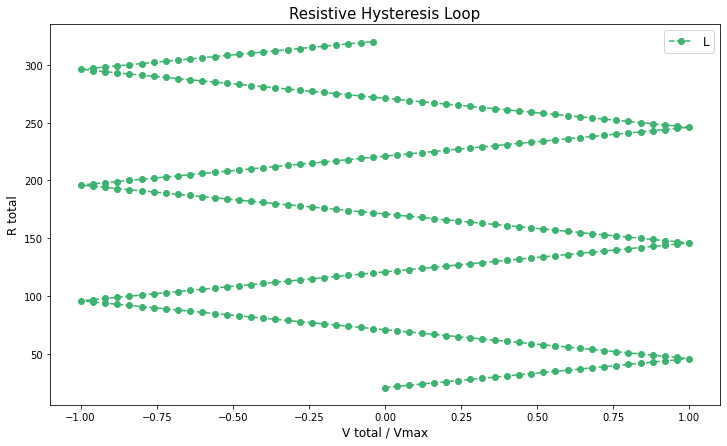

In [10]:
#print(rho_total)
#print(V_total)
V_normalizada= list(range(0,tau))
for t in t_ciclo:
    V_normalizada[t]= V_total[t]/Vmax

#-----------------------------------------------------------------------------------------------------#

plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.plot(V_normalizada, rho_total, 'o', linestyle='dashed', label='Loop #1', color='mediumseagreen')
plt.legend('Loop 1',fontsize=12)
plt.xlabel('V total / Vmax')
plt.ylabel('R total')
plt.title('Resistive Hysteresis Loop', fontsize=15)

Text(0.5, 1.0, 'Resistive Hysteresis Loop')

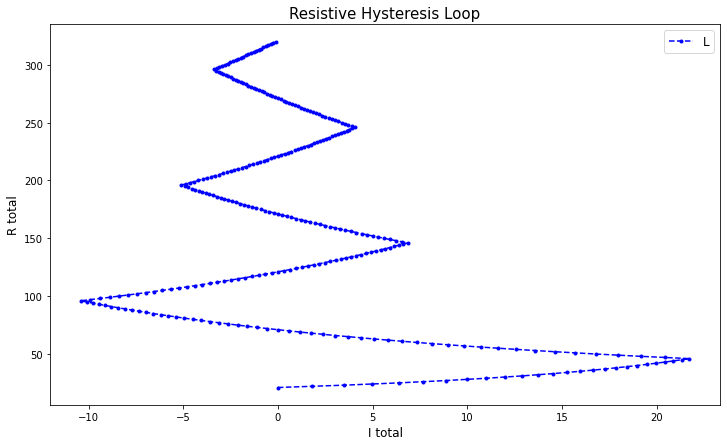

In [11]:
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.plot(i_total, rho_total, '.', linestyle='dashed', label='Loop #1', color='blue')
#plt.plot(turnos, acumulatedImmuneEnergyList, 'o', linestyle='dashed', label='Energía', color='mediumseagreen')
plt.legend('Loop 1',fontsize=12)
plt.xlabel( 'I total')
plt.ylabel('R total')
plt.title('Resistive Hysteresis Loop', fontsize=15)